# Part 1: Modeling Challenge

### Author: - Vineet Tyagi

Python Coding and Data Set

    Load in the data file and header file provided
        The dataframe does not currently have a header, load in the header file and attach it to the dataframe
    Comment on any steps you might take to evaluate or transform the dataset.
    Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.
    Write a function to generate bootstrap samples of the data.

Exploratory Analysis

    Identify 2-3 variables that are predictive of a malignant tumor.
        Display the relationship visually and write 1-2 sentences explaining the relationship.

Modeling

    Build a model to predict the malignant tumors.
        Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
        Identify how you would control for overfitting in each classification technique.
        Evaluate the performance of each model.
        In each model, identify the most important predictive variables and explain how you identified them.

Explanation

    To Technical Audiences
        Explain the limitations of your analysis and identify possible further steps you could take.
    To Non-Technical Audiences
        Write a short summary of your analysis, explaining how your model works and how it performs.
        Briefly explain the factors that contributed to malignant vs benign tumor identification.


In [709]:
import pandas as pd
import matplotlib as plt 

In [710]:
b_cancer = pd.read_csv('breast-cancer.csv', header=None)

b_cancer = pd.DataFrame(b_cancer)

In [711]:
col_Names= pd.read_csv('field_names.txt', header=None)

In [713]:
b_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [714]:
df1_transposed = col_Names.T

In [715]:
df1_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst


In [716]:
BCancer = pd.DataFrame(df1_transposed)
BCancer = BCancer.append(b_cancer)
BCancer = BCancer.reset_index(drop=True)

In [717]:
new_header = BCancer.iloc[0] #grab the first row for the header
BCancer = BCancer[1:] #take the data less the header row
BCancer.columns = new_header #set the header row as the df header

In [718]:
BCancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


### Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

#### First we will figure out the types of values we have in 'diagnosis' column

In [719]:
BCancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

#### we only have 2 types of values in the column 'diagnosis'. 

In [720]:
BCancer.dtypes

0
ID                            object
diagnosis                     object
radius_mean                   object
radius_sd_error               object
radius_worst                  object
texture_mean                  object
texture_sd_error              object
texture_worst                 object
perimeter_mean                object
perimeter_sd_error            object
perimeter_worst               object
area_mean                     object
area_sd_error                 object
area_worst                    object
smoothness_mean               object
smoothness_sd_error           object
smoothness_worst              object
compactness_mean              object
compactness_sd_error          object
compactness_worst             object
concavity_mean                object
concavity_sd_error            object
concavity_worst               object
concave_points_mean           object
concave_points_sd_error       object
concave_points_worst          object
symmetry_mean                 object

#### As we can observe that we need to change the data type of all the attributes to integer for further processing

In [723]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in BCancer.columns:
    BCancer[col] = labelencoder.fit_transform(BCancer[col])
 
BCancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
1,41,1,370,1,455,452,444,531,521,526,...,425,41,497,516,358,516,520,483,485,506
2,42,1,426,186,486,513,120,215,321,396,...,419,199,465,511,158,210,278,401,222,375
3,488,1,406,324,478,487,403,459,478,516,...,399,261,455,491,287,464,438,468,445,361
4,489,1,98,297,164,95,471,533,507,493,...,215,298,281,194,408,524,511,479,499,533
5,490,1,418,60,493,506,332,414,480,492,...,381,28,453,470,239,245,415,363,81,216


In [724]:
BCancer.describe()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,0.372583,219.586995,236.855888,264.537786,268.790861,253.130053,271.586995,263.478032,264.727592,...,221.154657,253.363796,263.010545,271.968366,205.957821,262.147627,264.219684,237.790861,247.949033,268.906854
std,164.400426,0.483918,125.770848,133.385694,151.005745,154.619229,136.250342,154.125189,158.267635,159.494408,...,125.999108,144.907096,146.811822,156.612745,109.645933,151.004941,157.531181,144.145369,141.957663,153.812855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142.000000,0.000000,118.000000,125.000000,134.000000,136.000000,136.000000,138.000000,126.000000,127.000000,...,116.000000,131.000000,138.000000,136.000000,116.000000,134.000000,130.000000,112.000000,126.000000,136.000000
50%,284.000000,0.000000,209.000000,235.000000,266.000000,268.000000,265.000000,277.000000,265.000000,263.000000,...,218.000000,254.000000,271.000000,275.000000,204.000000,259.000000,265.000000,242.000000,251.000000,269.000000
75%,426.000000,1.000000,322.000000,347.000000,396.000000,401.000000,373.000000,403.000000,398.000000,402.000000,...,326.000000,376.000000,387.000000,408.000000,295.000000,393.000000,401.000000,362.000000,369.000000,400.000000
max,568.000000,1.000000,455.000000,478.000000,521.000000,538.000000,473.000000,536.000000,536.000000,541.000000,...,456.000000,510.000000,513.000000,543.000000,410.000000,528.000000,538.000000,491.000000,499.000000,534.000000


#### There are 357 cases where diagnosis came out as benign 'B' and 212 cases where it is malignant 'M'

In [725]:
BCancer.groupby(by=['diagnosis'])['diagnosis'].count()

diagnosis
0    357
1    212
Name: diagnosis, dtype: int64

In [726]:
BCancer = BCancer.drop('ID', 1)

In [727]:
BCancer.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
1,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
2,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
3,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
4,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
5,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216


#### Now we will group the cases disgnosis wise

In [728]:
data_M = BCancer[BCancer.diagnosis == 1]

In [729]:
data_B = BCancer[BCancer.diagnosis == 0]

#### Checking Smoothness and Compactness mean for malignant (M)

In [730]:
data_M['smoothness_mean'].describe()

count    212.000000
mean     387.806604
std      113.057446
min       60.000000
25%      330.250000
50%      413.500000
75%      480.250000
max      532.000000
Name: smoothness_mean, dtype: float64

In [731]:
data_M['compactness_mean'].describe()

count    212.000000
mean     343.033019
std      128.574296
min       40.000000
25%      253.000000
50%      359.500000
75%      445.250000
max      540.000000
Name: compactness_mean, dtype: float64

#### Checking Smoothness and Compactness mean  for benign (B)

In [732]:
data_B['smoothness_mean'].describe()

count    357.000000
mean     188.815126
std      120.866346
min        0.000000
25%       87.000000
50%      177.000000
75%      278.000000
max      476.000000
Name: smoothness_mean, dtype: float64

In [733]:
data_B['compactness_mean'].describe()

count    357.000000
mean     221.952381
std      150.883672
min        0.000000
25%       98.000000
50%      199.000000
75%      333.000000
max      539.000000
Name: compactness_mean, dtype: float64

#### If there is a considerable difference between mean and median smoothness and compactness for two attributes then it means they are good features for differentiating. And we can observe that difference here.

### Bootstraping

In [735]:
import numpy as np
np.random.seed(400)
BCancer.iloc[np.random.choice(5, 3)]

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
5,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216
2,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
5,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216


## Exploratory Analysis

#### Identifying 2-3 variables that are predictive of a malignant tumor. 

#### Seperating lables from the dataset

In [736]:
X = BCancer.iloc[:,1:31]  
Y = BCancer.iloc[:, 0]

In [737]:
X

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
1,370,1,455,452,444,531,521,526,416,483,...,425,41,497,516,358,516,520,483,485,506
2,426,186,486,513,120,215,321,396,219,91,...,419,199,465,511,158,210,278,401,222,375
3,406,324,478,487,403,459,478,516,348,184,...,399,261,455,491,287,464,438,468,445,361
4,98,297,164,95,471,533,507,493,426,498,...,215,298,281,194,408,524,511,479,499,533
5,418,60,493,506,332,414,480,492,216,147,...,381,28,453,470,239,245,415,363,81,216
6,159,107,223,200,463,477,440,423,355,470,...,238,206,309,308,394,492,472,380,466,516
7,376,282,445,458,251,333,374,402,207,114,...,387,326,457,475,286,325,394,408,335,328
8,233,313,308,293,446,465,335,362,388,465,...,291,343,343,371,369,419,305,349,373,498
9,192,349,280,243,462,497,469,468,407,459,...,240,395,322,305,380,495,475,432,483,485
10,160,407,238,196,445,524,501,436,339,490,...,224,502,270,295,399,528,536,452,482,534


### Standardizing the data

In [738]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

### Ridge

In [739]:
from sklearn.linear_model import Ridge

In [740]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### Negative cofficient means they are not contributing much so we can ignore them.

In [741]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["%s" % x for x in df1_transposed.iloc[0,1:]]
    lst = sorted(zip(coefs, names))
    if sort:
        lst = sorted(lst)
    return " \n ".join("%s ------------- %s" % (round(coef, 3), names)
                                   for coef, names in lst)

In [742]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.325 ------------- concave_points_mean 
 -0.178 ------------- radius_worst 
 -0.123 ------------- texture_sd_error 
 -0.109 ------------- area_mean 
 -0.063 ------------- compactness_mean 
 -0.054 ------------- smoothness_worst 
 -0.044 ------------- fractal_dimension_sd_error 
 -0.033 ------------- area_sd_error 
 -0.009 ------------- compactness_worst 
 -0.008 ------------- radius_sd_error 
 -0.006 ------------- perimeter_sd_error 
 0.003 ------------- compactness_sd_error 
 0.012 ------------- symmetry_worst 
 0.013 ------------- concave_points_worst 
 0.017 ------------- texture_mean 
 0.034 ------------- radius_mean 
 0.037 ------------- smoothness_sd_error 
 0.038 ------------- perimeter_worst 
 0.048 ------------- symmetry_mean 
 0.05 ------------- concavity_mean 
 0.059 ------------- concavity_worst 
 0.061 ------------- fractal_dimension_mean 
 0.062 ------------- perimeter_mean 
 0.07 ------------- symmetry_sd_error 
 0.092 ------------- area_worst 
 0.119 ----

#### Here we can see "concavity_sd_error" , "concave_points_sd_error" and "texture_worst" are the 3 most essential features.

In [665]:
# dflis = pretty_print_coefs(ridge.coef_)

<BarContainer object of 30 artists>

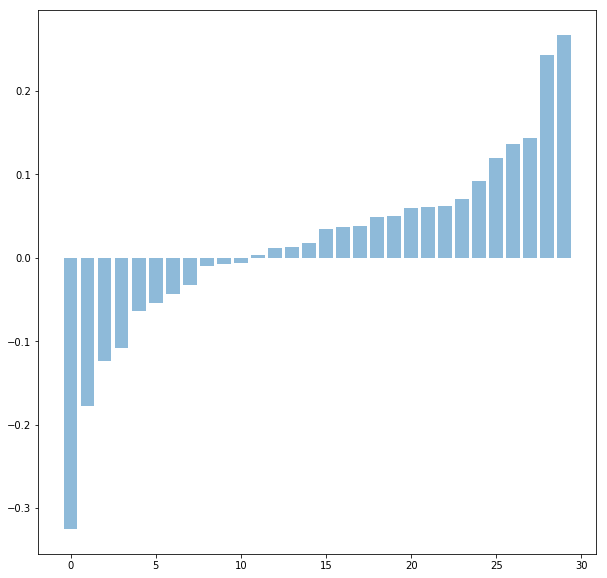

In [743]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.bar(range(30),sorted(ridge.coef_) , alpha=0.5, align='center')

#### LDA

In [744]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(341, 30) (341,)
(228, 30) (228,)


In [745]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train, Y_train)  
X_test = lda.transform(X_test) 

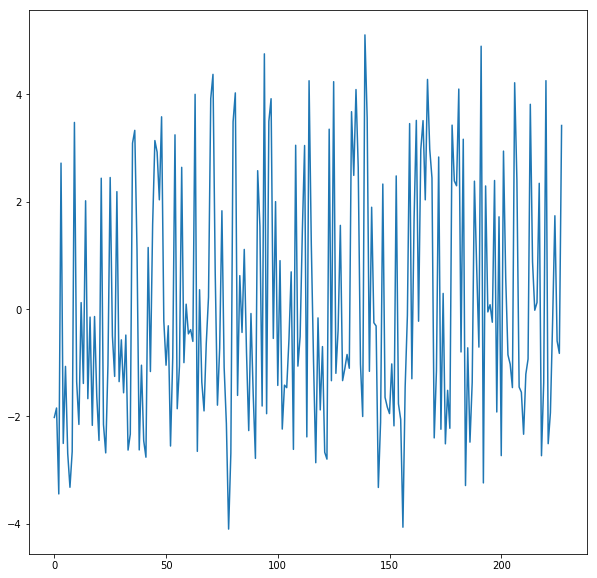

In [746]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(X_test)
# plt.bar(range(30),Y_test , alpha=0.5, align='center')

## Modeling

In [747]:
X = BCancer.iloc[:,1:31]  
Y = BCancer.iloc[:, 0]

In [748]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(341, 30) (341,)
(228, 30) (228,)


In [749]:
X_test

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
299,260,204,315,331,3,68,97,68,120,67,...,264,250,319,344,24,264,189,149,174,215
438,252,119,305,323,116,105,156,230,165,156,...,247,144,298,313,133,106,127,147,210,148
181,453,351,519,536,402,496,519,539,211,125,...,454,442,511,540,302,442,470,485,268,282
142,327,197,399,411,282,352,337,360,251,267,...,344,251,398,429,205,274,312,287,240,294
13,394,418,484,471,285,526,485,502,413,480,...,363,379,450,447,57,435,384,383,368,462
67,27,319,25,24,367,206,80,78,166,410,...,25,413,26,27,338,172,105,115,274,402
306,109,412,123,133,27,94,69,60,291,146,...,92,415,109,111,28,118,76,59,389,74
520,173,142,221,215,416,344,175,234,368,367,...,199,148,237,238,303,230,168,165,340,348
483,216,52,276,266,386,362,253,333,198,369,...,211,62,246,260,252,311,220,304,385,413
526,6,28,9,7,359,199,105,79,144,437,...,9,67,14,11,365,273,207,196,305,474


### 1.SVM

In [750]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

svm = svm.LinearSVC()

In [751]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

cross_val_score(svm, X, Y, cv=cv)  

array([0.79532164, 0.84210526, 0.83625731, 0.85964912, 0.90643275])

In [752]:
svm.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [753]:
# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(Y_train, svm.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, svm.predict(X_test)))
print("Confusion matrix ", confusion_matrix(Y_test, svm.predict(X_test)))

Train Accuracy ::  0.9120234604105572
Test Accuracy  ::  0.8421052631578947
Confusion matrix  [[143   6]
 [ 30  49]]


#### SVM
#### Train Accuracy ::  0.9120234604105572
#### Test Accuracy  ::  0.8421052631578947

### 2.Neural Network

In [754]:
from sklearn.neural_network import MLPClassifier

In [755]:
mlp = MLPClassifier()
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [756]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(mlp, X, Y, cv=cv)

array([0.70760234, 0.9122807 , 0.86549708, 0.87719298, 0.93567251])

In [757]:
# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(Y_train, mlp.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, mlp.predict(X_test)))
#print("Confusion matrix ", confusion_matrix(Y_test, mlp.predict(X_test)))

Train Accuracy ::  0.9824046920821115
Test Accuracy  ::  0.9078947368421053


In [758]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred)
confusion_matrix

array([[139,  10],
       [ 12,  67]])

In [759]:
auc_roc=metrics.classification_report(Y_test,Y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.92      0.93      0.93       149\n          1       0.87      0.85      0.86        79\n\navg / total       0.90      0.90      0.90       228\n'

In [760]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5,0,'FP Rate')

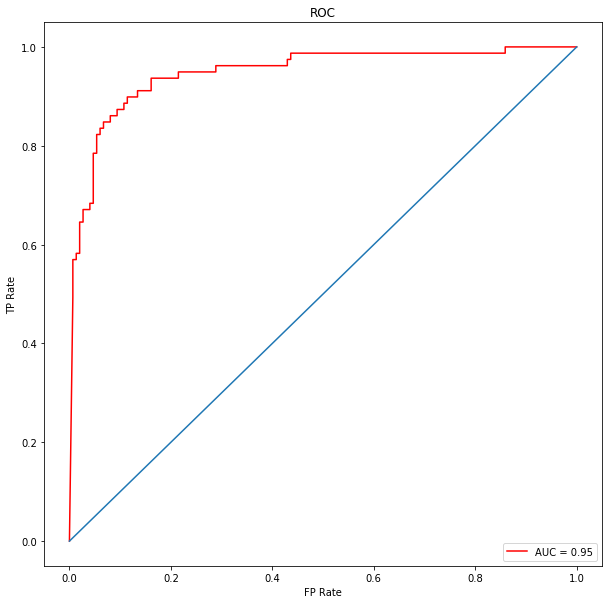

In [764]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')

#### Neural Network
#### Train Accuracy ::  0.9032258064516129
#### Test Accuracy  ::  0.9035087719298246

## Explaination

### To Technical Audiences: - 

The datasets used in this challenge is "breast-cancer.csv" and "field_names.txt". initially I used some basic data preprocessing steps and created a dataframe with appropriate headers. After that I computed the mean and median smoothness and compactness for benign and malignant tumors. Where we came up with the observation that there is a considerable difference between mean and median smoothness and compactness for two attributes and that they are good features for differentiating.
In Exploratory Analysis, I used Ridge and observed that "concavity_sd_error" , "concave_points_sd_error" and "texture_worst" are the 3 most essential features. 
In modeling, I used 2 models - SVM and Neural Networks. To avoid over-fitting I used cross validation method. The accuracy of both models are given below: - 


SVM



Train Accuracy :: 0.9120234604105572
Test Accuracy :: 0.8421052631578947

Neural Network



Train Accuracy :: 0.9032258064516129
Test Accuracy :: 0.9035087719298246

The reason behind such high accuracy is that the dataset provided is comparetively small and features have comparetively less complex relations.


### To Non-Technical Audiences: -

In this challenge, we tried to do data preprocessing at first, then we found out that benign and malignant attributes are good features for differentiating and reason behind it is the difference between the mean and median smoothness and compactness of both the attributes. After that we did modeling where we used 2 models - SVM and Neural networks and caluculated their test and train accuracy. To counter the problem of over-fitting, we used cross validation method.

# Part 2: Feedback

## Code 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression            #Should call "LinearRegression" from "sklearn.linear_model" instead
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')           #Should use './' and give proper file name "part-2-data.train.csv"


# Setup data for prediction
x1 = data.SalaryNormalized                     #No dataframe called "data". Convert "d" to "data" instead.
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split     #Should split data into train and test before using "cross_val_score" method.
#X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size = split_percent)
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')  #"cv" should be equal to 2 since there are 2 classes
print(scores.mean())


## Code 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('./train.csv')


# Setup data for prediction               # Should switch X with y because y is training data and X is labels
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model                           #Should split data into train and test before using "cross_val_score" method.
#X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size = split_percent)
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')   #Switch X with y
print(scores.mean())